# Project setup

In [1]:
# Lib import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Lib config
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)
sns.set_style("darkgrid")

In [4]:
# Read file
df = pd.read_csv('telecom_customer_churn.csv')

# Dataset exploration

In [5]:
# Dimensions
df.shape

(7043, 38)

In [6]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [7]:
# Types
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [8]:
# Missing values check
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

- 682 customers don't subscribed home phone service plan 

- 1526 customers don't subscribed to internet service

- 5174 customers didn't churned

In [9]:
# Duplicate check
df['Customer ID'].duplicated().value_counts()

False    7043
Name: Customer ID, dtype: int64

No duplicates

In [10]:
# Object rows check
objt = df.select_dtypes("object").drop(['Customer ID', 'City'], axis = 1)
pd.Series(list(map(set,objt.values.T)),index=objt.columns)

Gender                                                       {Male, Female}
Married                                                           {No, Yes}
Offer                     {None, Offer C, Offer A, Offer B, Offer E, Off...
Phone Service                                                     {No, Yes}
Multiple Lines                                               {No, nan, Yes}
Internet Service                                                  {No, Yes}
Internet Type                                {Fiber Optic, nan, Cable, DSL}
Online Security                                              {No, nan, Yes}
Online Backup                                                {No, nan, Yes}
Device Protection Plan                                       {No, nan, Yes}
Premium Tech Support                                         {No, nan, Yes}
Streaming TV                                                 {No, nan, Yes}
Streaming Movies                                             {No, nan, Yes}
Streaming Mu

No incoherent data

# Data profiling

In [11]:
# Descriptive stats
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


- No outliers

- No incoherent data

<Figure size 640x480 with 0 Axes>

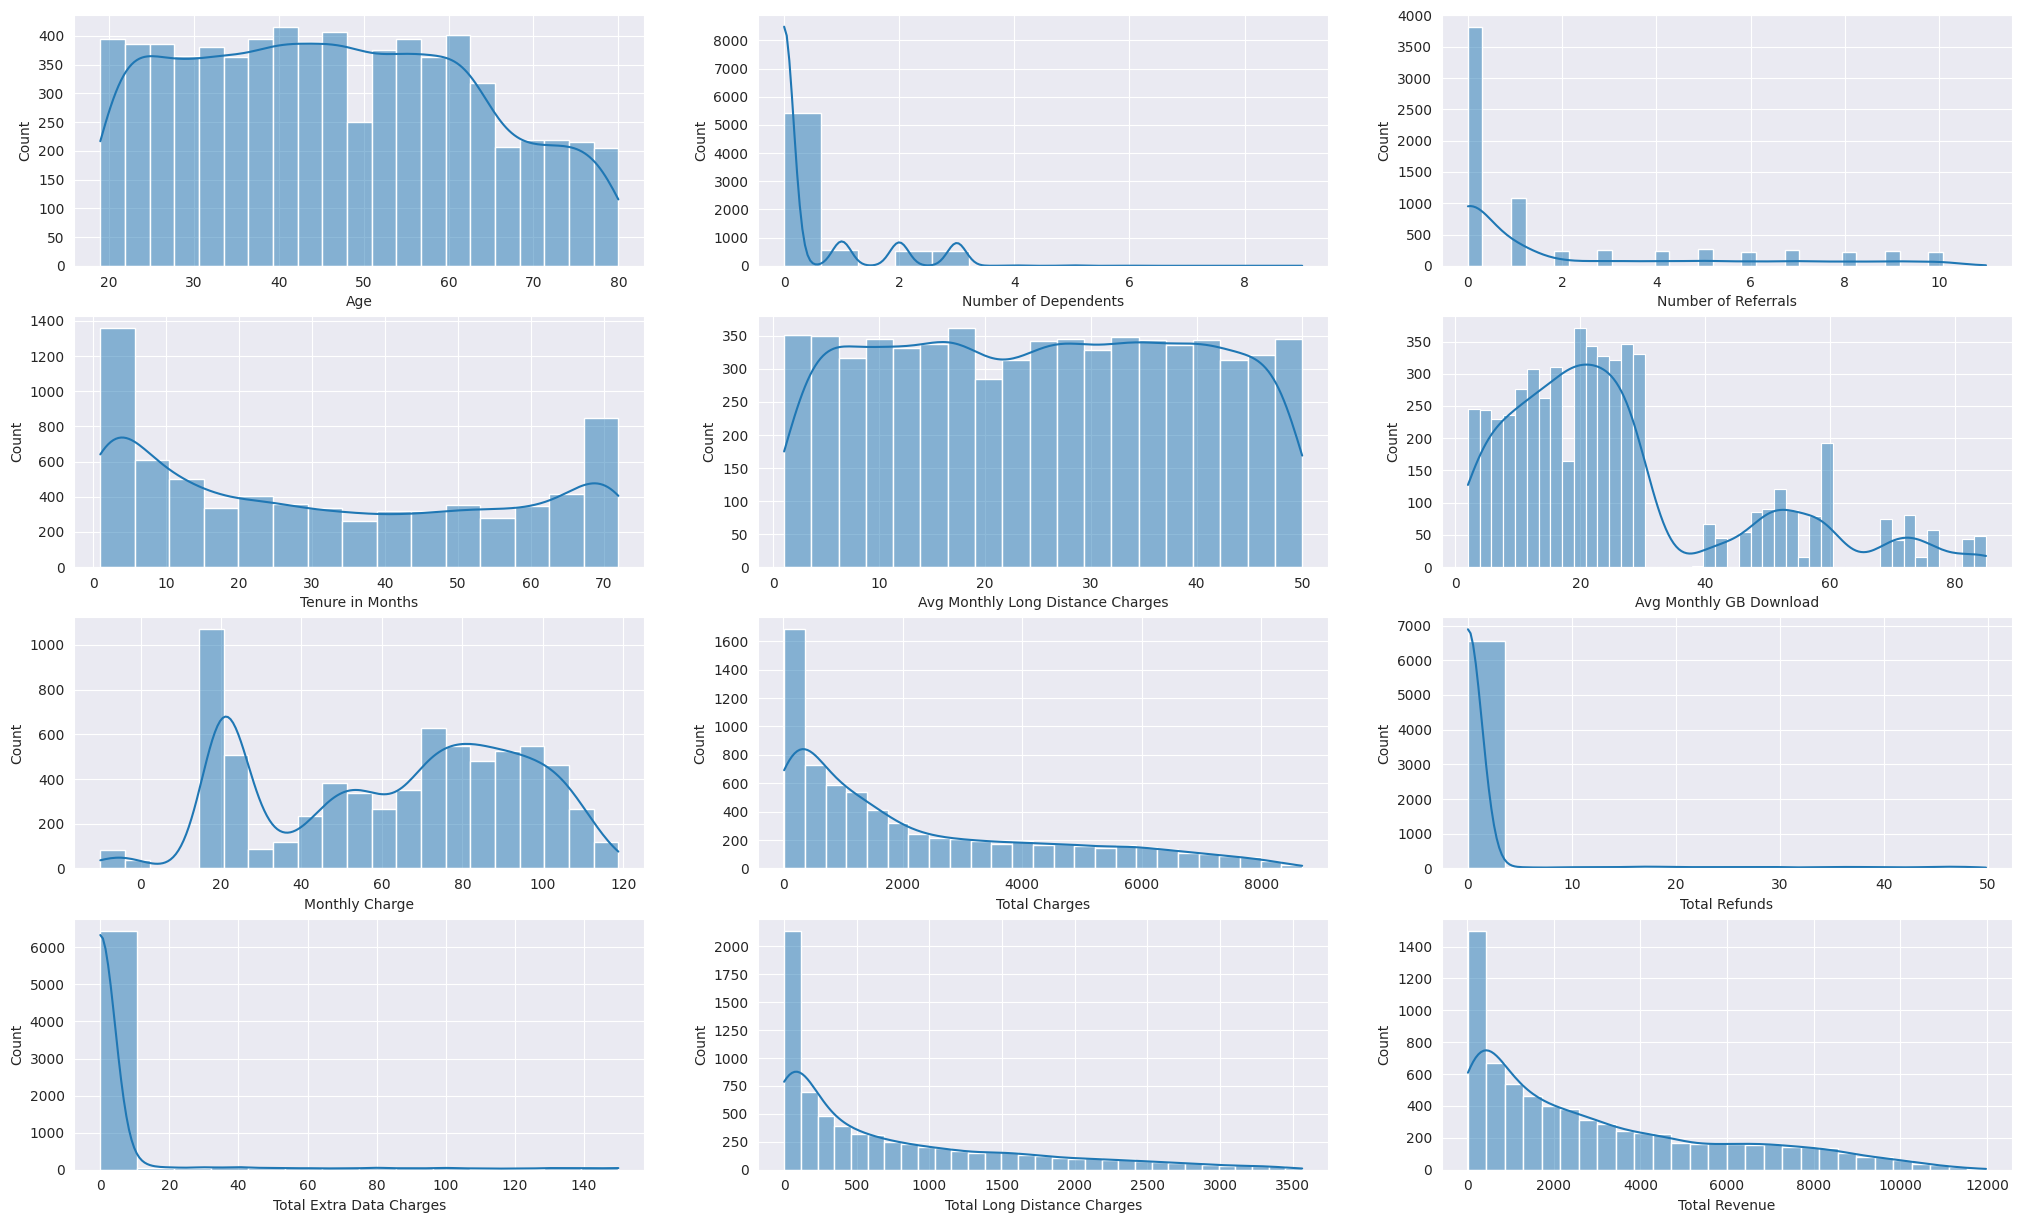

In [12]:
# Distributions of quantitave data
nogeo = df.drop(['Zip Code', 'Latitude', 'Longitude'], axis = 1) # Dropping geography fields

plt.figure()
plt.subplots(4,3, figsize = (25,15))

i = 1
for c in nogeo.select_dtypes(exclude = 'object'):
  plt.subplot(4,3,i)
  sns.histplot(x = nogeo[c],kde = True)
  i += 1

<Figure size 640x480 with 0 Axes>

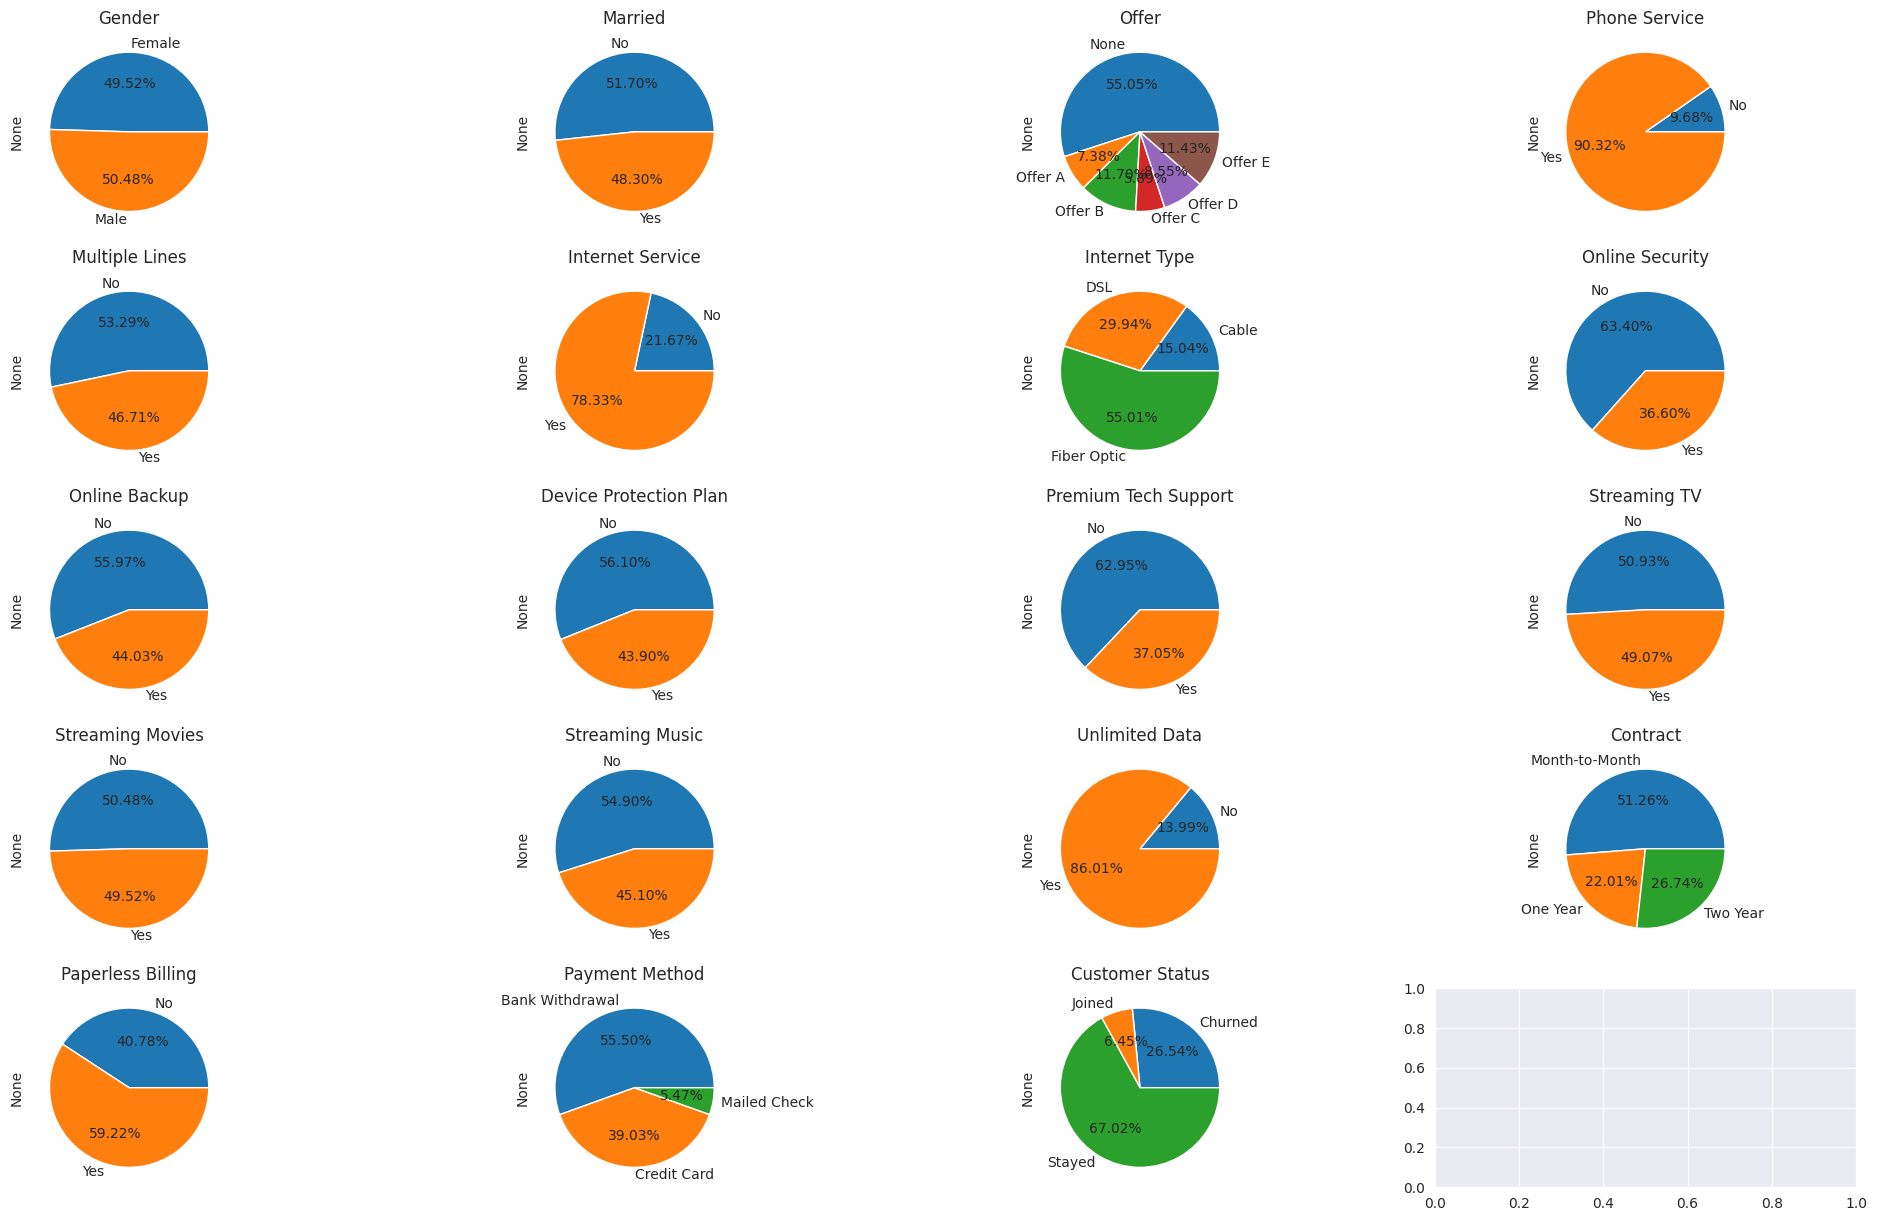

In [13]:
# Qualitative data
qdata = df.drop(['Customer ID', 'City', 'Churn Category', 'Churn Reason'], axis = 1)
plt.figure()
plt.subplots(5,4, figsize = (25,15))

i = 1
for c in qdata.select_dtypes('object'):
  plt.subplot(5,4,i)
  qdata.groupby([c]).size().plot(kind = 'pie', autopct = '%.2f%%')
  plt.title(c)
  i += 1

# Functionnal analysis

## Churn

([<matplotlib.patches.Wedge at 0x7f6daf896c40>,
 [Text(-0.5604479811676993, 0.9465189170877941, 'Stayed'),
  Text(0.3586221713095951, -1.0398991000309556, 'Churned'),
  Text(1.0775211031566014, -0.22124256428676015, 'Joined')],
 [Text(-0.30569889881874507, 0.5162830456842513, '67.0%'),
  Text(0.1956120934415973, -0.5672176909259757, '26.5%'),
  Text(0.5877387835399643, -0.1206777623382328, '6.4%')])

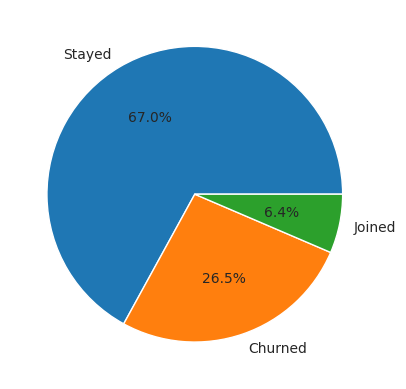

In [14]:
# Customer Status
status = pd.Series(df['Customer Status'].unique())
plt.pie(df['Customer Status'].value_counts(), labels = status, autopct = '%1.1f%%')

<Axes: xlabel='count', ylabel='Churn Reason'>

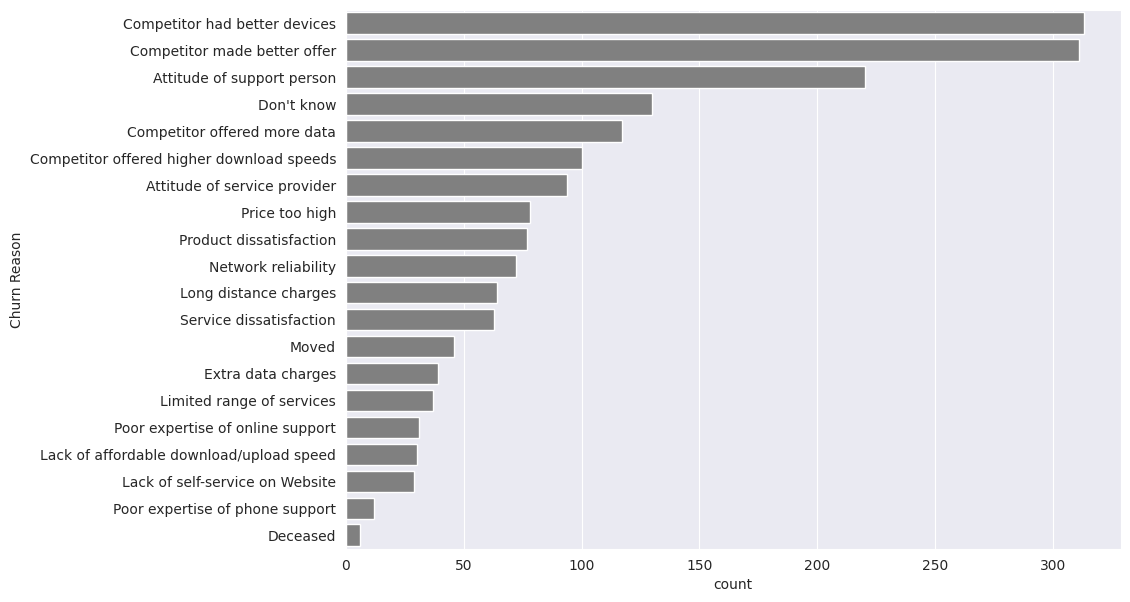

In [46]:
# Churn reason
plt.figure(figsize = (10, 7))
sns.countplot(y = df['Churn Reason'], order = df['Churn Reason'].value_counts().index, color = 'grey')

Our competitor are the major threat

Attitude of our employees in support have to be rectified

In [47]:
# Churn impact on revenue
df.groupby('Customer Status')['Total Revenue'].sum()

Customer Status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: Total Revenue, dtype: float64

In [48]:
# Churn impact on revenue in pct
(df.groupby('Customer Status')['Total Revenue'].sum() / df['Total Revenue'].sum()) * 100

Customer Status
Churned    17.240359
Joined      0.253986
Stayed     82.505655
Name: Total Revenue, dtype: float64

Churn represent 17% of revenue loss for a total loss of 3 684 459$

In [16]:
# Creating a new field for active customer
df['Active'] = np.where(df['Customer Status'] == 'Churned', 'Churned', 'Active')

###Churners profile

In [ ]:
# Qantitative stats
plt.figure()
plt.subplots(4,3, figsize = (25,15))
i = 1

for c in nogeo.select_dtypes(exclude = 'object'):
  plt.subplot(4,3,i)
  sns.histplot(x = nogeo[c], hue = df['Active'], palette = ['lightgreen', 'darkred'], kde = True)
  i += 1

#plt.savefig("Churn overall quantitative_stats.png")

**Insights:**
- Newjoiner (Tenure < 5 months) tend to churn the most.
- More churn on the higher Monthly charge
- Total charge and Revenue: Higher churn count for lower amount, Newjoiners spend less because they don't stay much

In [ ]:
# Qualitative stats
quali = df.drop(['Customer ID', 'City', 'Churn Reason', 'Latitude','Longitude', 'Zip Code'], axis = 1) #Dropping useless fiels
quali = quali.loc[quali['Active'] == 'Churned']

plt.figure()
plt.subplots(5,5, figsize = (25,15))
i = 1

for c in quali.select_dtypes(include = 'object'):
  plt.subplot(5,5,i)
  pie = quali.groupby([c]).size().plot(kind='pie', autopct = '%.2f%%')
  pie.set(xlabel = None, ylabel = None)
  plt.title(str(c), loc='center')
  i += 1

#plt.savefig("Churn overall qualitative_stats.png")

**Insights:**
- Fiber Optic is the most churned technology
- Offer E appears to be the most popular offer around churned customers. Perhaps the company may want to review and look for potential pain points about this offer.
- More than half of churned customers haven't subscribed to additional internet services and streaming services.
- 88.55% choose to pay their bills at a monthly basis.
- As mentioned before our competitors are the N°1 threat

Do Newcomers have a higher monthly charge ?

In [ ]:
df[['Monthly Charge','Tenure in Months']].corr()

,Monthly Charge,Tenure in Months
Monthly Charge,1.000000,0.239065
Tenure in Months,0.239065,1.000000


Monthly charge and tenure are not correlated

In [ ]:
# Newcomers vs Permanent
New = df.loc[df['Tenure in Months'] < 10]
Perm = df.loc[df['Tenure in Months'] > 10]

plt.figure()
plt.subplots(2,2,figsize = (15,15))

plt.subplot(2,2,1)
sns.histplot(x = New['Monthly Charge'], hue = New['Active'])
plt.title('Newcomers Monthly Charge (< 10 Months)')

plt.subplot(2,2,2)
sns.boxplot(x = New['Monthly Charge'], y = New['Active'])
plt.title('Newcomers Monthly Charge (< 10 Months)')

plt.subplot(2,2,3)
sns.histplot(x = Perm['Monthly Charge'], hue = df['Active'])
plt.title('Permanent Monthly Charge')

plt.subplot(2,2,4)
sns.boxplot(x = Perm['Monthly Charge'], y = df['Active'])
plt.title('Permanent Monthly Charge')

plt.show()

Same distribution between the 2 customers profiles.
On higher charges, there is more churner among newcomers 

### **Recommendations**
- Identify what's wrong with offer E
- Competitor threat: A market study is needed
- More marketing on additional services as they are a retain factor
- too much month-to-month contracts is not a fidelity habit. Pushing more on year contract

## Socio-demographic

([<matplotlib.patches.Wedge at 0x7fb86c9511c0>,
 [Text(-0.016436707732256382, 1.0998771907076375, 'Female'),
  Text(0.016436707732256247, -1.0998771907076375, 'Male')],
 [Text(-0.008965476944867117, 0.5999330131132566, '50.5%'),
  Text(0.008965476944867044, -0.5999330131132566, '49.5%')])

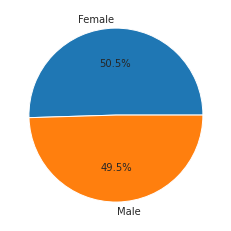

In [ ]:
# Gender pct
gender = pd.Series(df['Gender'].unique())
plt.pie(df['Gender'].value_counts(), labels = gender, autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fb86c827400>,
 [Text(-0.05860659335486817, 1.0984376483056912, 'Yes'),
  Text(0.05860649051171347, -1.0984376537928315, 'No')],
 [Text(-0.031967232739019, 0.5991478081667406, '51.7%'),
  Text(0.031967176642752795, -0.5991478111597263, '48.3%')])

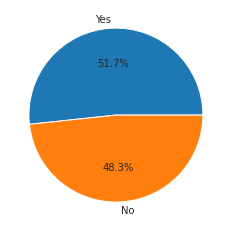

In [ ]:
# Married pct
married = pd.Series(df['Married'].unique())
plt.pie(df['Married'].value_counts(), labels = married, autopct = '%1.1f%%')

<Axes: xlabel='Number of Dependents', ylabel='count'>

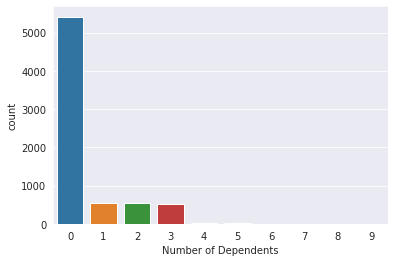

In [ ]:
# House composition
sns.countplot(x= 'Number of Dependents', data = df, )

In [ ]:
df.pivot_table(index = ['Gender', 'Married'], values=['Age'] , aggfunc= 'mean')

Age  Number of Dependents
Gender Married                                 
Female No       47.308889              0.138889
       Yes      45.581161              0.808649
Male   No       45.845736              0.194460
       Yes      47.298133              0.774796

## Financial 💰

In [ ]:
# Total revenue
df['Total Revenue'].sum()

21371131.69

In [ ]:
# Revenue generated by contracts
df.groupby('Contract').agg({'Total Revenue': ['mean', 'sum', 'count']})

Total Revenue                  
                        mean         sum count
Contract                                      
Month-to-Month   1707.060449  6162488.22  3610
One Year         3981.802781  6171794.31  1550
Two Year         4799.176399  9036849.16  1883

<ipython-input-58-f408328db71c>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
<ipython-input-58-f408328db71c>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


<Figure size 640x480 with 0 Axes>

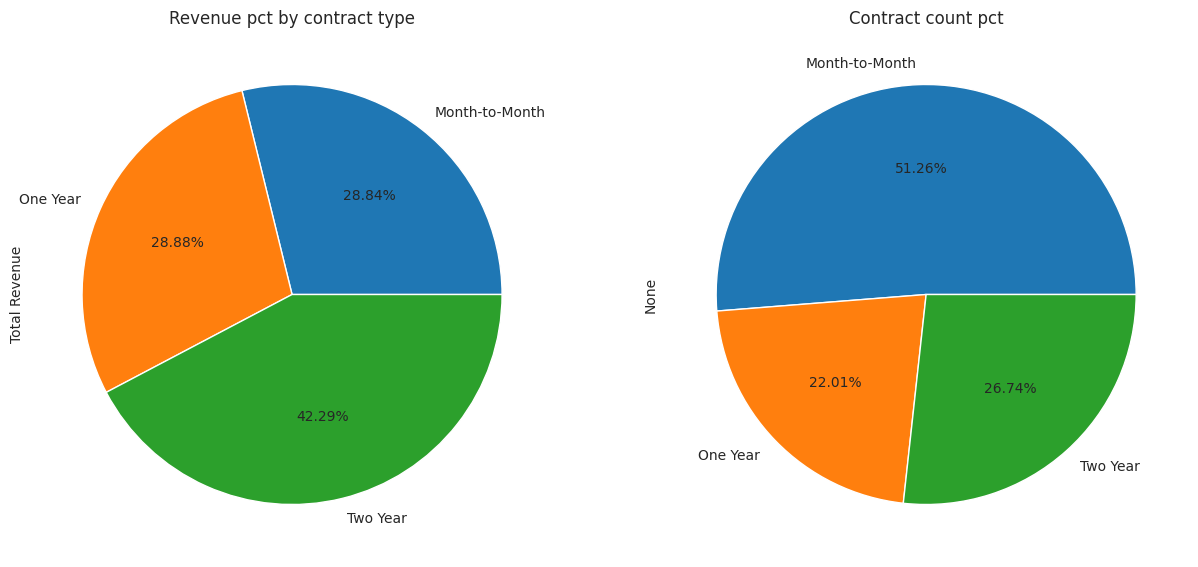

In [58]:
# Contract viz
plt.figure()
plt.subplots(1,2,figsize = (15,15))

plt.subplot(2,2,1)
df.groupby('Contract')['Total Revenue'].sum().plot(kind='pie', autopct = '%.2f%%')
plt.title('Revenue pct by contract type')

plt.subplot(2,2,2)
df.groupby('Contract').size().plot(kind='pie', autopct = '%.2f%%')
plt.title('Contract count pct')

plt.show()

**Insights**
- Too much Month-to-Month contracts, it's bad for customer retention

## Geographic

In [61]:
# How many customers in cities
df.groupby('City').size().sort_values(ascending = False)

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
South Lake Tahoe      2
Jacumba               2
Johannesburg          2
Holtville             2
Eldridge              2
Length: 1106, dtype: int64

In [ ]:
map = px.scatter_geo(df, lat='Latitude', lon = 'Longitude', fitbounds="locations",size='Total Revenue', width= 750, height=400)
map.update_layout(margin={"r":0,"t":20,"l":0,"b":0},title = 'Customer Locations', title_x=0.5, title_y = 0.98)
map.show()